In [1]:
#Importing tensorflow
import tensorflow as tf
#Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model


In [2]:
#Loading the data(Fashion MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 #Normalizing
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [3]:
class_number = len(set(y_train))
print("Number of classes in dataset:", class_number)

Number of classes in dataset: 10


In [4]:
#Since the data is 2D and convolution expects height*width*color, we create an extra dimension
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [5]:
#Building Model using Keras API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(class_number, activation = 'softmax')(x)

model = Model(i,x)

In [6]:
#Compile and Fit, train using GPU
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

result = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 25s 6ms/step - loss: 0.5255 - accuracy: 0.8037 - val_loss: 0.4005 - val_accuracy: 0.8515
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3658 - accuracy: 0.8624 - val_loss: 0.3427 - val_accuracy: 0.8699
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3165 - accuracy: 0.8797 - val_loss: 0.3216 - val_accuracy: 0.8813
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2824 - accuracy: 0.8928 - val_loss: 0.3125 - val_accuracy: 0.8827
Epoch 5/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2570 - accuracy: 0.9028 - val_loss: 0.3055 - val_accuracy: 0.8876
Epoch 6/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2342 - accuracy: 0.9125 - val_loss: 0.2987 - val_accuracy: 0.8939
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2168 - accuracy: 0.9175 - val_loss: 0.2983 - val_ac

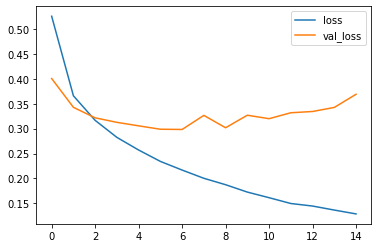

In [7]:
#Plotting Training and Validation Loss
plt.plot(result.history['loss'], label = "loss")
plt.plot(result.history['val_loss'], label = "val_loss")
plt.legend()

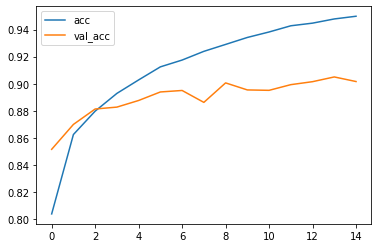

In [8]:
#Plotting Train and val accuracy
plt.plot(result.history['accuracy'], label = "acc")
plt.plot(result.history['val_accuracy'], label = "val_acc")
plt.legend()

Confusion Matrix Non-Normalized
[[864   2  26  19   7   1  78   0   3   0]
 [  1 977   1  12   4   0   3   0   1   1]
 [ 16   3 855   9  54   0  62   0   1   0]
 [ 14  10  15 900  31   2  27   0   1   0]
 [  2   1  49  26 862   0  59   0   1   0]
 [  0   0   0   2   0 969   0  20   3   6]
 [112   1  53  30 106   0 687   0  11   0]
 [  0   0   0   0   0   7   0 978   0  15]
 [  6   0   6   2   4   2   8   2 970   0]
 [  1   0   0   0   0   5   0  40   0 954]]


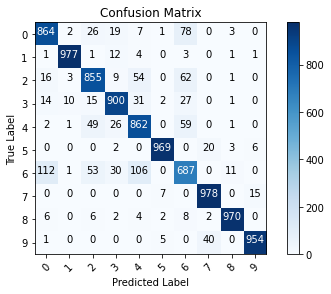

In [10]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools 
def plot_CM(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix Non-Normalized')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt), horizontalalignment = 'center', color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_CM(cm, list(range(10)))


In [11]:
# Label mapping
labels = '''T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle boot'''.split(" ")

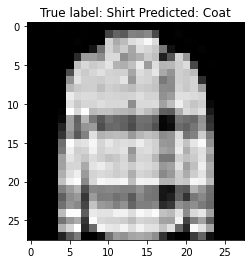

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));